# Single Artificial Neuron

In [1]:
import numpy as np
import data_gen
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

## Data Preperation

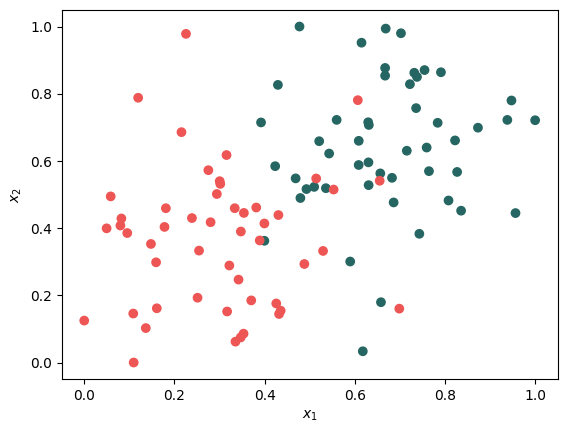

In [ ]:
data = data_gen.two_blobs(50, 50)
cmap = ListedColormap(["#266662", "#B68E15", "#00B0F0", "#9E5E9B", "#ED5654"])
plt.scatter(data[:, 0], data[:, 1], c= data[:, 2], cmap=cmap)
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

## Artificial Neuron

We'll define the smallest neural network in the unsiverse consisting only of a single Neuron

In [ ]:
def weighted_sum_h(x, w, b):
    # first multiply each input x by their respective weight w as vector
    
    weighted_inputs = x*w
    # Summing all Products up yielding a scalar and adding the bias b
    weighted_sum = np.sum(weighted_inputs, axis=1) + b
    # and finally the activation function. For now we'll choose the heavyside function
    # The result will be either 0 or 1
    # With that we can implement a small classifier already
    return weighted_sum

In [ ]:
w = np.array([1,1])

b = -1,5

x = np.array([0,0], [0,1], [1,1])

weighted_sum_h(x, w, b)


TypeError: array() takes from 1 to 2 positional arguments but 3 were given

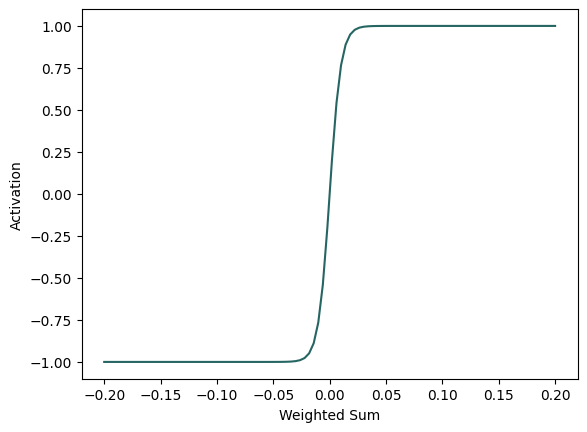

In [ ]:
def activation_y(weighted_sum):
    return np.tanh(weighted_sum*100)

# visualizing the acitvation function
x = np.linspace(-0.2, 0.2, 100)
y = activation_y(x)
plt.plot(x, y, c="#266662")
plt.xlabel("Weighted Sum")
plt.ylabel("Activation")
plt.show()

Accuracy reached: 0.92


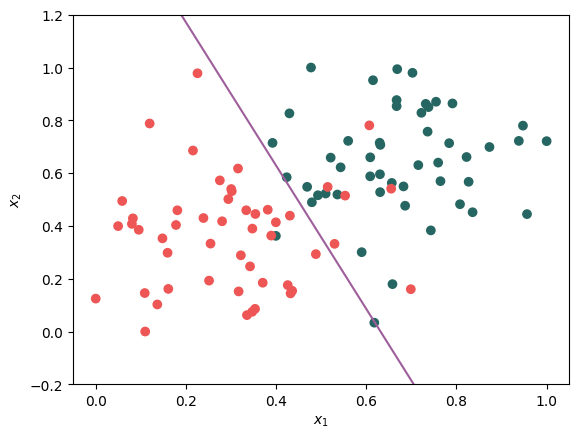

In [ ]:
# using the toy data as input. We'll process all data entries at once
x = data[:, :2]
# TODO: Try to adjust the weights and bias to get a feeling for what they do.
# TODO: Try to reach the maximum accuracy.
w = np.array([-.95, -0.35])
b = 0.6

# defining the decision boundary 
decision_boundary_x1 = np.linspace(np.min(data[:, 0]), np.max(data[:, 0]), num=10)
decision_boundary_x2 = (w[0] * decision_boundary_x1 + b) / w[1] # x2 > -w1 x1 + b / w2
# and plotting it together with the data points
plt.plot(decision_boundary_x1, -decision_boundary_x2, c=cmap(3))
plt.scatter(data[:, 0], data[:, 1], c= data[:, 2], cmap=cmap)
plt.ylim(-0.2, 1.2)
#comparing the prediction to the ground truth and printing the accuracy
h = weighted_sum_h(x, w, b)
prediction = activation_y(h)
y_truth = data[:, -1]

accuracy = np.sum(np.sign(prediction) == np.sign(y_truth)) / len(y_truth)
print(f"Accuracy reached: {accuracy}")
plt.savefig("decission_boundary_init.png", dpi=200, bbox_inches="tight")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.show()

## The Loss Function

In order to automatically optimize the neuron, a simple loss function is defined to measure the error. This function needs to be minimized 

In [ ]:
def loss(y_pred, y_truth):
    return np.sum((y_pred - y_truth)**2)

Loss Minimum at: -0.3492462311557789 , -0.9763819095477388


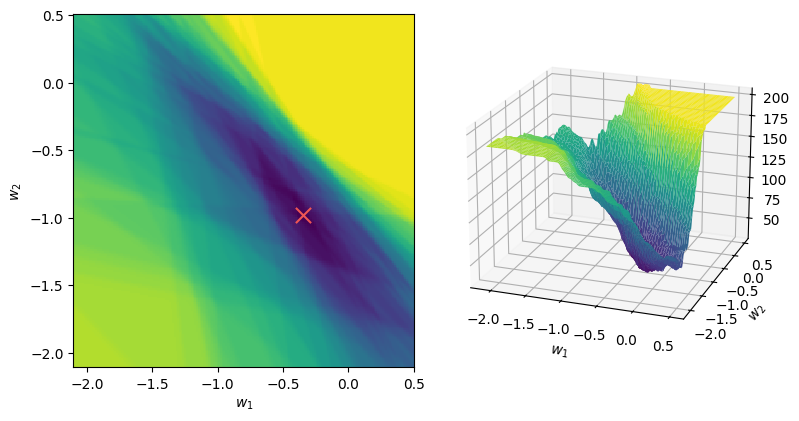

In [ ]:
weight_range = np.linspace(-2.1, 0.5, 200)
loss_array = np.zeros([200, 200])
for i, w1 in enumerate(weight_range):
    for j, w2 in enumerate(weight_range):
        h = weighted_sum_h(x, [w1, w2], 0.6)
        y_pred = activation_y(h)
        loss_array[i, j] = loss(y_pred, y_truth)
grid_range_x, grid_range_y = np.meshgrid(weight_range, weight_range)
min_index = np.argwhere(loss_array == np.min(loss_array))[0]
print("Loss Minimum at:", weight_range[min_index[1]], ",", weight_range[min_index[0]])

fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(222, projection='3d')
ax1.set_xlabel(r"$w_1$")
ax1.set_ylabel(r"$w_2$")

ax2 = fig.add_subplot(221)
ax2.set_xlabel(r"$w_1$")
ax2.set_ylabel(r"$w_2$")
ax1.view_init(elev=20, azim=290)
ax1.plot_surface(grid_range_x, grid_range_y, loss_array, cmap="viridis")
ax2.pcolormesh(weight_range, weight_range, loss_array)
ax2.scatter(weight_range[min_index[1]], weight_range[min_index[0]],
            marker="x", color="#ED5654", s=120)
plt.tight_layout()
plt.savefig("loss_landscape.png", dpi=200, bbox_inches="tight")
plt.show()

## Gradient Descent

#### Derivative of Activation function

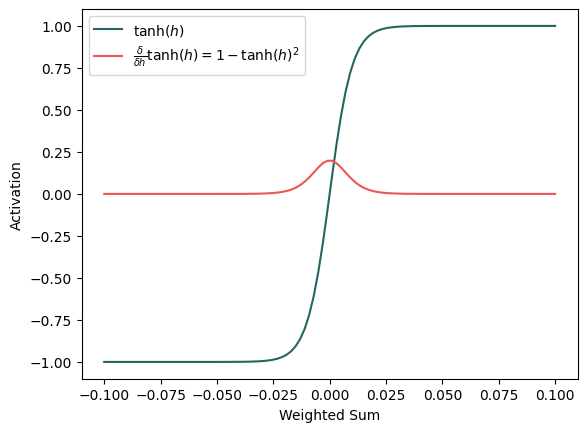

In [ ]:
x_derivative = np.linspace(-0.1, 0.1, 100)
y_derivative = activation_y(x_derivative)
dydx = np.gradient(np.array([x_derivative, y_derivative]), axis=1)

plt.plot(x_derivative, y_derivative, c="#266662", label=r"$\mathrm{tanh}(h)$")
plt.plot(x_derivative, dydx[1], c="#ED5654", label=r"$\frac{\delta}{\delta h}\mathrm{tanh}(h)=1-\mathrm{tanh}(h)^2$")
plt.legend()
plt.xlabel("Weighted Sum")
plt.ylabel("Activation")
plt.show()


In [ ]:
def grad_loss(weights, bias, x, y_truth):
    # implement together
            
    return gradient_w

In [ ]:
# finding a local minimum
#init_weights = [-1., -1.5]
#init_bias = 0.6
#eps = 0.001
#max_steps = 1000
#learning_rate = 0.01

# learning rate too large
init_weights = [-1., -1.5]
init_bias = 0.6
eps = 0.0
max_steps = 1000
learning_rate = 1.2

# learning rate fine
#init_weights = [-1., -1.5]
#init_bias = 0.6
#eps = 0.001
#max_steps = 1000
#learning_rate = 0.05

steps = 0
new_weights = init_weights
grad = grad_loss(weights=new_weights, bias=init_bias, x=x, y_truth=y_truth)
min_grad = np.linalg.norm(grad)

weight_history = list()
while steps < max_steps and min_grad > eps:
    
    weight_history += [np.array(new_weights)]
    new_weights += learning_rate * grad
    grad = grad_loss(weights=new_weights, bias=0.6, x=x, y_truth=y_truth)
    steps += 1
    min_grad = np.linalg.norm(grad)

weight_history = np.array(weight_history)
print(new_weights)
print(steps)

NameError: name 'gradient_w' is not defined

In [ ]:
plt.figure(figsize=(9, 6))
plt.pcolormesh(weight_range, weight_range, loss_array)
plt.plot(weight_history[:, 1], weight_history[:, 0], c="#ED5654", marker=".")
plt.colorbar()
plt.savefig("momentum_00.png", dpi=200, bbox_inches="tight")
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.show()